In [ ]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importando e lendo os dados
df = pd.read_json('/content/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# verificando informações das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# Expandindo cada coluna aninhada
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatenando todas com as colunas principais
df = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Exibindo as primeiras linhas
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# verificando informações das colunas após normalização do json
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# verificando nomes das colunas
colunas = list(df.columns)
colunas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [ ]:
# Dicionário de mapeamento para renomear colunas para português
colunas_traduzidas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_Parceiro',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Papel',
    'PaymentMethod': 'Forma_Pagamento',
    'Charges.Monthly': 'Gastos_Mensais',
    'Charges.Total': 'Gastos_Totais'
}

# Aplicando a renomeação
df.rename(columns=colunas_traduzidas, inplace=True)

In [ ]:
# verificando nomes das colunas após tradução
colunas = list(df.columns)
colunas

['ID_Cliente',
 'Evasao',
 'Genero',
 'Idoso',
 'Possui_Parceiro',
 'Possui_Dependentes',
 'Meses_Contrato',
 'Servico_Telefone',
 'Multiplas_Linhas',
 'Tipo_Internet',
 'Seguranca_Online',
 'Backup_Online',
 'Protecao_Dispositivo',
 'Suporte_Tecnico',
 'Streaming_TV',
 'Streaming_Filmes',
 'Tipo_Contrato',
 'Fatura_Papel',
 'Forma_Pagamento',
 'Gastos_Mensais',
 'Gastos_Totais']

In [ ]:
# Verificação de valores vazios/em branco em cada coluna
valores_vazios = {}

for col in df.columns:
    # Converte para string (para evitar erro em colunas numéricas)
    col_serie = df[col].astype(str).str.strip()

    # Cria filtro: NaN verdadeiro OU string vazia OU espaço em branco
    filtro = df[col].isnull() | (col_serie == '') | (col_serie == 'nan')

    # Conta os valores "vazios disfarçados"
    qtde_vazios = filtro.sum()

    if qtde_vazios > 0:
        valores_vazios[col] = qtde_vazios

# Exibe o total de valores ausentes por coluna (reais ou disfarçados)
print("Colunas com valores vazios (NaN, '', ' ' ou 'nan'):")
for coluna, total in valores_vazios.items():
    print(f"{coluna}: {total}")


Colunas com valores vazios (NaN, '', ' ' ou 'nan'):
Evasao: 224
Gastos_Totais: 11


In [ ]:
# Registros onde Evasao está em branco, espaço ou NaN
filtro_evasao = df['Evasao'].astype(str).str.strip().isin(['', 'nan']) | df['Evasao'].isnull()
df_evasao_vazios = df[filtro_evasao]

# Exibir os registros
print(f"Total de registros com Evasao indefinida: {df_evasao_vazios.shape[0]}")
df_evasao_vazios


Total de registros com Evasao indefinida: 224


,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Forma_Pagamento,Gastos_Mensais,Gastos_Totais
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [ ]:
# Converte Gastos_Totais para numérico
df['Gastos_Totais'] = pd.to_numeric(df['Gastos_Totais'], errors='coerce')

# Filtra os registros com valor ausente
df_gastos_vazios = df[df['Gastos_Totais'].isnull()]

# Exibir os registros
print(f"Total de registros com Gastos_Totais indefinido: {df_gastos_vazios.shape[0]}")
df_gastos_vazios


Total de registros com Gastos_Totais indefinido: 11


,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Forma_Pagamento,Gastos_Mensais,Gastos_Totais
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [ ]:
# Cria backup dos registros com Gastos_Totais em branco (clientes novos)
registros_gastos_vazios = df[df['Gastos_Totais'].isnull()]

# Normaliza e identifica registros com Evasao vazia
df['Evasao'] = df['Evasao'].astype(str).str.strip()
registros_evasao_vazia = df[df['Evasao'].isnull() | (df['Evasao'] == '') | (df['Evasao'].str.lower() == 'nan')]

# Junta todos os registros descartados (com base no índice)
indices_descartados = registros_gastos_vazios.index.union(registros_evasao_vazia.index)
df_descartados = df.loc[indices_descartados]

# Remove esses registros do dataframe principal
df = df.drop(index=indices_descartados)

# Confirmações
print(f"Registros removidos (descartados): {df_descartados.shape[0]}")
print(f"Registros restantes para análise: {df.shape[0]}")


Registros removidos (descartados): 235
Registros restantes para análise: 7032


In [ ]:
# Verifica número total de linhas duplicadas
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}")


Registros duplicados: 0


In [ ]:
# Mostra quantos valores nulos existem em cada coluna
print("Valores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
ID_Cliente              0
Evasao                  0
Genero                  0
Idoso                   0
Possui_Parceiro         0
Possui_Dependentes      0
Meses_Contrato          0
Servico_Telefone        0
Multiplas_Linhas        0
Tipo_Internet           0
Seguranca_Online        0
Backup_Online           0
Protecao_Dispositivo    0
Suporte_Tecnico         0
Streaming_TV            0
Streaming_Filmes        0
Tipo_Contrato           0
Fatura_Papel            0
Forma_Pagamento         0
Gastos_Mensais          0
Gastos_Totais           0
dtype: int64


In [ ]:
# Verificando valores diversos nas colunas que contenham "Yes" ou "No" para posterior substituição
for col in df.columns:
    if df[col].dtype == 'object':
        valores_unicos = df[col].dropna().unique()
        if any(val in ['Yes', 'No'] for val in valores_unicos):
            print(f"{col}: {valores_unicos}")


Evasao: ['No' 'Yes']
Possui_Parceiro: ['Yes' 'No']
Possui_Dependentes: ['Yes' 'No']
Servico_Telefone: ['Yes' 'No']
Multiplas_Linhas: ['No' 'Yes' 'No phone service']
Tipo_Internet: ['DSL' 'Fiber optic' 'No']
Seguranca_Online: ['No' 'Yes' 'No internet service']
Backup_Online: ['Yes' 'No' 'No internet service']
Protecao_Dispositivo: ['No' 'Yes' 'No internet service']
Suporte_Tecnico: ['Yes' 'No' 'No internet service']
Streaming_TV: ['Yes' 'No' 'No internet service']
Streaming_Filmes: ['No' 'Yes' 'No internet service']
Fatura_Papel: ['Yes' 'No']


In [ ]:
# Substituindo No internet service e No phone service por apenas "No"
df.replace({
    'No internet service': 'No',
    'No phone service': 'No'
}, inplace=True)


In [ ]:
# Identifica novamente as colunas com apenas 'Yes' e 'No' (após substituição)
colunas_binarias = [col for col in df.columns if df[col].dropna().isin(['Yes', 'No']).all()]

# Faz a substituição por 1 e 0
df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})


<ipython-input-37-498726757>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})


In [ ]:
# mostra as colunas após substituição por 1 e 0
for col in colunas_binarias:
    print(f"{col}: {df[col].unique()}")


Evasao: [0 1]
Possui_Parceiro: [1 0]
Possui_Dependentes: [1 0]
Servico_Telefone: [1 0]
Multiplas_Linhas: [0 1]
Seguranca_Online: [0 1]
Backup_Online: [1 0]
Protecao_Dispositivo: [0 1]
Suporte_Tecnico: [1 0]
Streaming_TV: [1 0]
Streaming_Filmes: [0 1]
Fatura_Papel: [1 0]


In [ ]:
# mostra as informações das colunas com as alterações até aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7032 non-null   object 
 1   Evasao                7032 non-null   int64  
 2   Genero                7032 non-null   object 
 3   Idoso                 7032 non-null   int64  
 4   Possui_Parceiro       7032 non-null   int64  
 5   Possui_Dependentes    7032 non-null   int64  
 6   Meses_Contrato        7032 non-null   int64  
 7   Servico_Telefone      7032 non-null   int64  
 8   Multiplas_Linhas      7032 non-null   int64  
 9   Tipo_Internet         7032 non-null   object 
 10  Seguranca_Online      7032 non-null   int64  
 11  Backup_Online         7032 non-null   int64  
 12  Protecao_Dispositivo  7032 non-null   int64  
 13  Suporte_Tecnico       7032 non-null   int64  
 14  Streaming_TV          7032 non-null   int64  
 15  Streaming_Filmes      7032

In [ ]:
# define as colunas que estão como object para string
colunas_objeto = ['ID_Cliente', 'Genero', 'Tipo_Internet', 'Tipo_Contrato', 'Forma_Pagamento']
df[colunas_objeto] = df[colunas_objeto].astype('string')



In [ ]:
# confirmando a alteração
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7032 non-null   string 
 1   Evasao                7032 non-null   int64  
 2   Genero                7032 non-null   string 
 3   Idoso                 7032 non-null   int64  
 4   Possui_Parceiro       7032 non-null   int64  
 5   Possui_Dependentes    7032 non-null   int64  
 6   Meses_Contrato        7032 non-null   int64  
 7   Servico_Telefone      7032 non-null   int64  
 8   Multiplas_Linhas      7032 non-null   int64  
 9   Tipo_Internet         7032 non-null   string 
 10  Seguranca_Online      7032 non-null   int64  
 11  Backup_Online         7032 non-null   int64  
 12  Protecao_Dispositivo  7032 non-null   int64  
 13  Suporte_Tecnico       7032 non-null   int64  
 14  Streaming_TV          7032 non-null   int64  
 15  Streaming_Filmes      7032

In [ ]:
# Cria uma coluna nova: contas diárias com base na coluna Gastos_Mensais
df['Contas_Diarias'] = df['Gastos_Mensais'] / 30

In [ ]:
# Quantidade de serviços adicionais contratados
df['Qtd_Servicos'] = df[['Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']].sum(axis=1)

# Tem internet (Tipo_Internet diferente de 'No')
df['Tem_Internet'] = df['Tipo_Internet'] != 'No'

In [ ]:
# visualizando como ficaram os dados com todas as alterações e correções feitas
df.head()

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Forma_Pagamento,Gastos_Mensais,Gastos_Totais,Contas_Diarias,Qtd_Servicos,Tem_Internet
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.186667,3,True
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,1,True
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,1,True
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,4,True
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,2,True


In [ ]:
# Análise Descritiva para entender a relação entre os dados
df.describe()

,Evasao,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Fatura_Papel,Gastos_Mensais,Gastos_Totais,Contas_Diarias,Qtd_Servicos
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940,2.038111
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866,1.847161
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333,6.000000


<ipython-input-59-3164078680>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Evasao', data=df, palette='pastel')


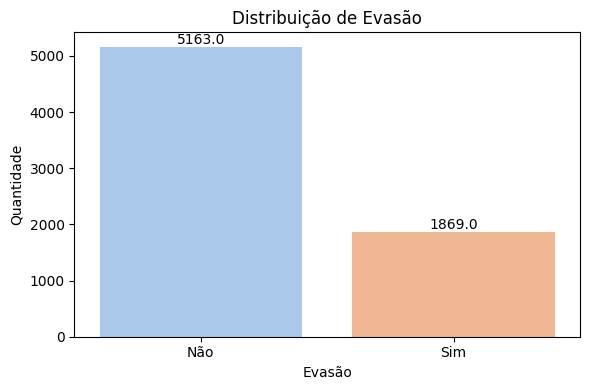

In [ ]:
# Gráfico com a distribuição de Evasão
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Evasao', data=df, palette='pastel')

plt.title('Distribuição de Evasão')
plt.xlabel('Evasão')
plt.ylabel('Quantidade')

# Rótulos de 0/1 para Não/Sim
ax.set_xticks([0, 1])
ax.set_xticklabels(['Não', 'Sim'])

# Valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

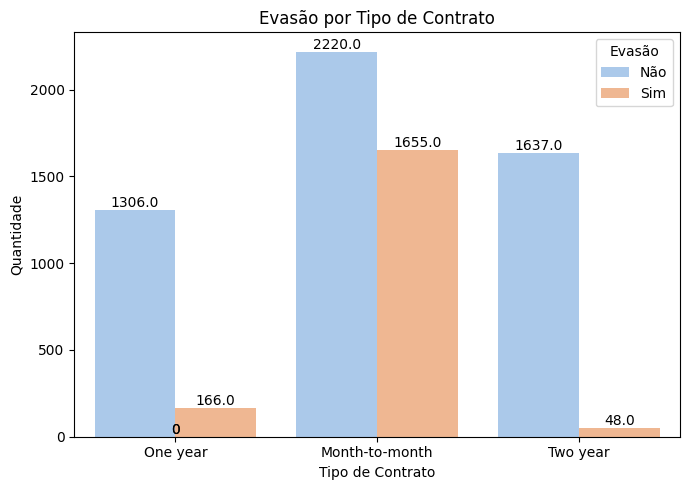

In [ ]:
# Gráfico de Evasão por tipo de contrato
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Tipo_Contrato', hue='Evasao', data=df, palette='pastel')

plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')

# Legenda como Não/Sim
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Não', 'Sim'], title='Evasão')

# Valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

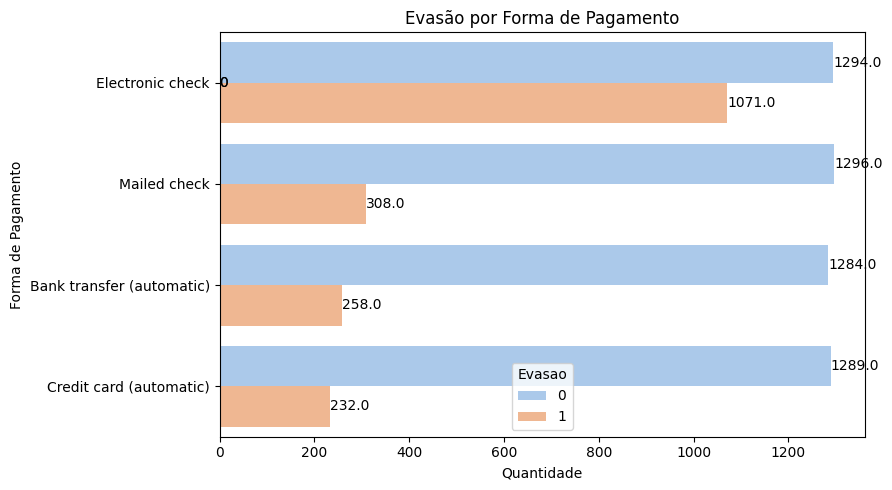

In [ ]:
# Gráfico de Evasão por Forma de Pagamento
plt.figure(figsize=(9,5))
ax = sns.countplot(y='Forma_Pagamento', hue='Evasao', data=df, palette='pastel', order=df['Forma_Pagamento'].value_counts().index)
plt.title('Evasão por Forma de Pagamento')
plt.xlabel('Quantidade')
plt.ylabel('Forma de Pagamento')

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center')

plt.tight_layout()
plt.show()


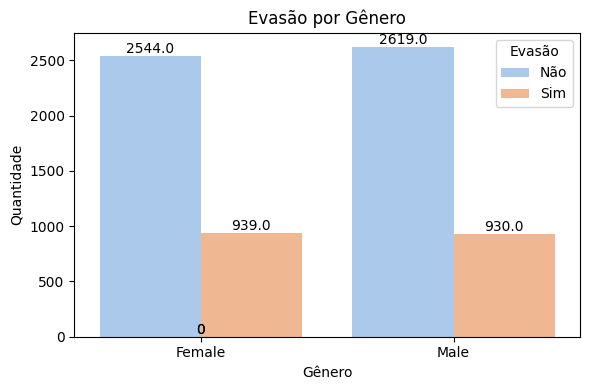

In [ ]:
# Gráfico de Evasão por Gênero
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Genero', hue='Evasao', data=df, palette='pastel')

plt.title('Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

# Altera legenda de 0/1 para Não/Sim
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Não', 'Sim'], title='Evasão')

# Valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

<ipython-input-50-1922710060>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Contas_Diarias', data=df, palette='pastel')


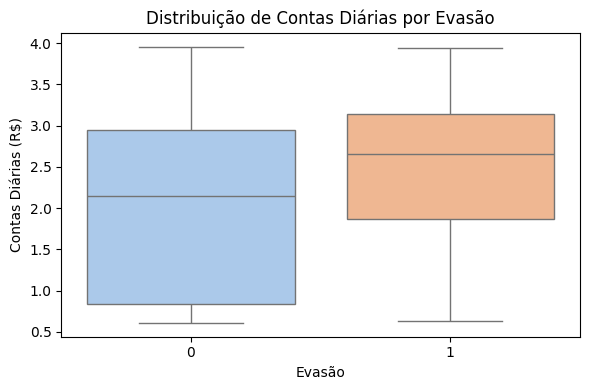

In [ ]:
# Distribuição de Contas Diárias por Evasão
plt.figure(figsize=(6,4))
sns.boxplot(x='Evasao', y='Contas_Diarias', data=df, palette='pastel')
plt.title('Distribuição de Contas Diárias por Evasão')
plt.xlabel('Evasão')
plt.ylabel('Contas Diárias (R$)')
plt.tight_layout()
plt.show()


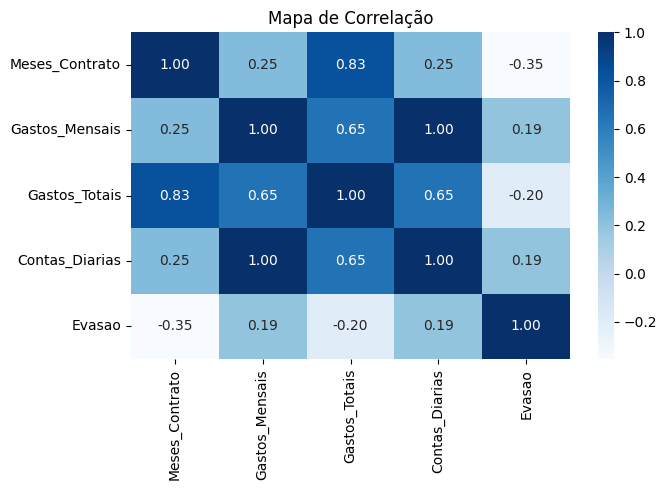

In [ ]:
# Mapa de Correlação
df['Evasao'] = df['Evasao'].astype(int)

plt.figure(figsize=(7,5))
corr = df[['Meses_Contrato', 'Gastos_Mensais', 'Gastos_Totais', 'Contas_Diarias', 'Evasao']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Mapa de Correlação')
plt.tight_layout()
plt.show()


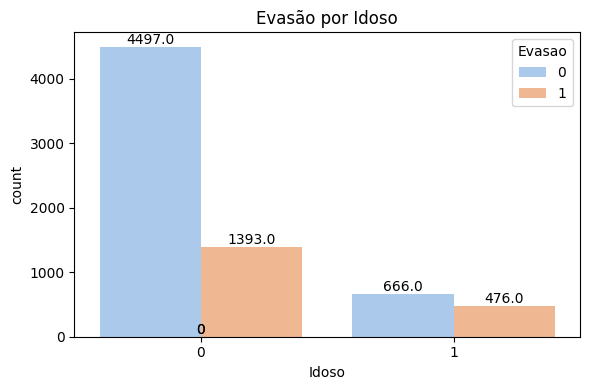

In [ ]:
# Evasão por Idoso
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Idoso', hue='Evasao', data=df, palette='pastel')
plt.title('Evasão por Idoso')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

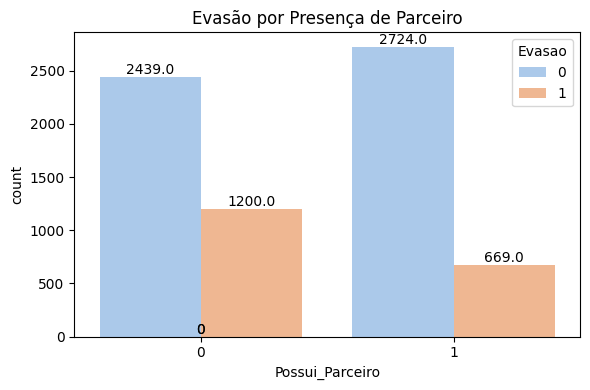

In [ ]:
# Evasão por Possui_Parceiro
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Possui_Parceiro', hue='Evasao', data=df, palette='pastel')
plt.title('Evasão por Presença de Parceiro')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

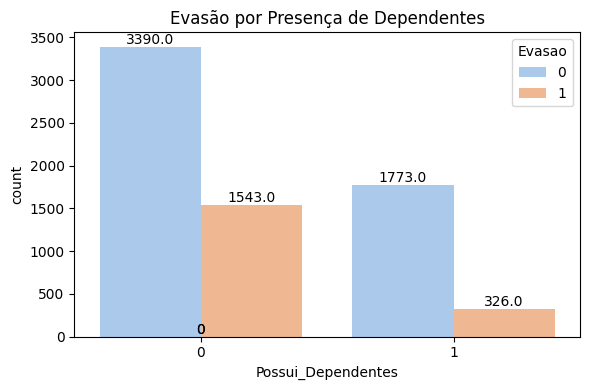

In [ ]:
# Evasão por Possui_Dependentes
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Possui_Dependentes', hue='Evasao', data=df, palette='pastel')
plt.title('Evasão por Presença de Dependentes')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

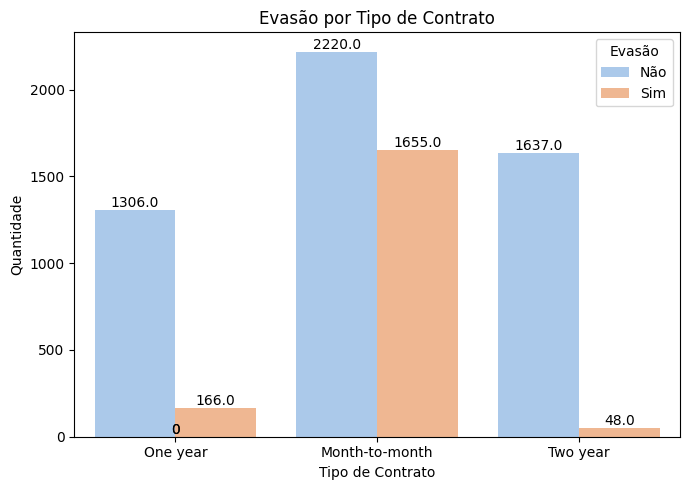

In [ ]:
# Evasão por Tipo de Contrato
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Tipo_Contrato', hue='Evasao', data=df, palette='pastel')

plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')

# Legenda como Não/Sim
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Não', 'Sim'], title='Evasão')

# Valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

<ipython-input-56-3286575649>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Evasao', y='Qtd_Servicos', data=df, palette='pastel')


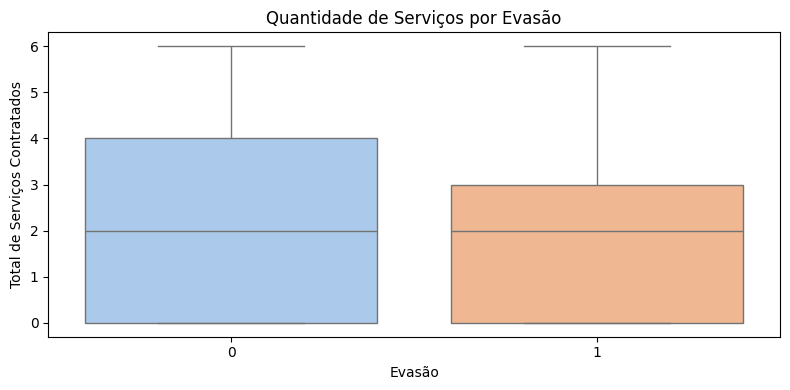

In [ ]:
# Evasão por Quantidade de Serviços
plt.figure(figsize=(8,4))
ax = sns.boxplot(x='Evasao', y='Qtd_Servicos', data=df, palette='pastel')
plt.title('Quantidade de Serviços por Evasão')
plt.xlabel('Evasão')
plt.ylabel('Total de Serviços Contratados')
plt.tight_layout()
plt.show()

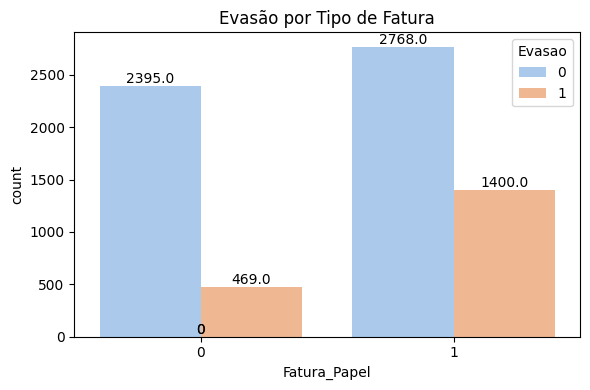

In [ ]:
# Evasão por Fatura_Papel
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Fatura_Papel', hue='Evasao', data=df, palette='pastel')
plt.title('Evasão por Tipo de Fatura')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

<h1>📑 Relatório Final – Projeto Telecom X – Análise de Evasão de Clientes</h1>

<h2>🎯 Objetivo</h2>
<p>Analisar os dados da empresa Telecom X para entender os fatores que levam clientes a cancelar os serviços (churn). A análise tem como foco identificar padrões, perfis de risco e gerar recomendações para redução da evasão.</p>

<h2>📦 Dados Utilizados</h2>
<ul>
  <li><b>Fonte:</b> API/JSON</li>
  <li><b>Registros após tratamento:</b> 7.032</li>
  <li><b>Colunas presentes:</b>
    <ul>
      <li>Dados demográficos: <code>Genero</code>, <code>Idoso</code>, <code>Possui_Parceiro</code>, <code>Possui_Dependentes</code></li>
      <li>Dados de serviços: <code>Tipo_Internet</code>, <code>Qtd_Servicos</code> + serviços adicionais</li>
      <li>Dados financeiros: <code>Gastos_Mensais</code>, <code>Gastos_Totais</code>, <code>Contas_Diarias</code></li>
      <li>Informações contratuais: <code>Tipo_Contrato</code>, <code>Forma_Pagamento</code>, <code>Fatura_Papel</code></li>
      <li>Variável alvo: <code>Evasao</code> (0 = manteve, 1 = cancelou)</li>
    </ul>
  </li>
</ul>

<h2>🔍 Análise Estatística Descritiva</h2>
<table>
  <tr>
    <th>Variável</th>
    <th>Média</th>
    <th>Mediana</th>
    <th>Mínimo</th>
    <th>Máximo</th>
  </tr>
  <tr>
    <td>Evasao</td>
    <td>26,6%</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Meses_Contrato</td>
    <td>32 meses</td>
    <td>29 meses</td>
    <td>1</td>
    <td>72</td>
  </tr>
  <tr>
    <td>Gastos_Mensais</td>
    <td>R$ 64,80</td>
    <td>R$ 70,35</td>
    <td>R$ 18,25</td>
    <td>R$ 118,75</td>
  </tr>
  <tr>
    <td>Gastos_Totais</td>
    <td>R$ 2.283</td>
    <td>R$ 1.397</td>
    <td>R$ 18,80</td>
    <td>R$ 8.684,80</td>
  </tr>
  <tr>
    <td>Contas_Diarias</td>
    <td>R$ 2,16</td>
    <td>R$ 2,34</td>
    <td>R$ 0,61</td>
    <td>R$ 3,96</td>
  </tr>
</table>

<h2>📊 Principais Análises e Insights</h2>
<ul>
  <li><b>Distribuição Geral:</b> Evasão total de <b>26,6%</b>.</li>
  <li><b>Por Idoso:</b> Idosos têm uma taxa de churn alta proporcionalmente.</li>
  <li><b>Por Presença de Parceiro:</b> Clientes <b>sem parceiro</b> têm taxa de evasão significativamente maior (~33%) comparado aos que possuem parceiro (~19%).</li>
  <li><b>Por Dependentes:</b> Clientes <b>sem dependentes</b> evadem mais que os que têm.</li>
  <li><b>Por Tipo de Internet:</b>
    <ul>
      <li>Clientes sem internet têm baixíssima evasão.</li>
      <li>Clientes com <b>Fiber Optic</b> possuem churn muito maior que os de DSL.</li>
    </ul>
  </li>
  <li><b>Por Quantidade de Serviços Contratados:</b>
    <ul>
      <li>Clientes que <b>contratam mais serviços adicionais</b> apresentam menor evasão.</li>
      <li>Churn médio:
        <ul>
          <li><b>Evadidos:</b> 2 serviços</li>
          <li><b>Não evadidos:</b> 3 a 4 serviços</li>
        </ul>
      </li>
    </ul>
  </li>
  <li><b>Por Tipo de Contrato:</b>
    <ul>
      <li><b>Month-to-month:</b> maior churn (~42%)</li>
      <li><b>One year/Two year:</b> churn muito baixo (~3% a 5%)</li>
    </ul>
  </li>
  <li><b>Por Forma de Pagamento:</b>
    <ul>
      <li><b>Electronic check:</b> maior churn (~45%)</li>
      <li><b>Pagamentos automáticos:</b> menor churn (~15%)</li>
    </ul>
  </li>
  <li><b>Por Fatura_Papel:</b> Usuários de <b>fatura digital</b> apresentam churn ligeiramente maior.</li>
</ul>

<h2>📈 Correlações</h2>
<table>
  <tr>
    <th>Variáveis</th>
    <th>Correlação com Evasao</th>
  </tr>
  <tr>
    <td>Meses_Contrato</td>
    <td>-0.35 (forte, negativa)</td>
  </tr>
  <tr>
    <td>Gastos_Totais</td>
    <td>-0.20 (moderada, negativa)</td>
  </tr>
  <tr>
    <td>Qtd_Servicos</td>
    <td>-0.21 (moderada, negativa)</td>
  </tr>
  <tr>
    <td>Gastos_Mensais</td>
    <td>+0.19 (leve, positiva)</td>
  </tr>
  <tr>
    <td>Contas_Diarias</td>
    <td>+0.19 (leve, positiva)</td>
  </tr>
</table>

<h2>🧩 Recomendações Estratégicas</h2>
<ul>
  <li><b>Incentivar contratos de longo prazo</b> (1 ou 2 anos) para reduzir churn.</li>
  <li><b>Estimular pagamentos automáticos</b> em vez de boleto eletrônico.</li>
  <li><b>Oferecer mais serviços adicionais</b> (backup, segurança, suporte) para aumentar a retenção.</li>
  <li><b>Criar campanhas específicas para idosos e clientes sem parceiro</b>, que têm maior risco de evasão.</li>
  <li><b>Atuar nos primeiros 9 meses de contrato</b>, onde o churn é mais expressivo.</li>
</ul>

<h2>🚀 Próximos Passos</h2>
<ul>
  <li>Construção de modelos de machine learning para prever churn.</li>
  <li>Desenvolvimento de dashboards interativos para monitoramento.</li>
  <li>Aplicação de testes A/B para validar as estratégias recomendadas.</li>
</ul>
